# DMD for El Niño

[<sup>[If you want to omit theory and go directly to the code.]</sup>](#code)

Dynamic Mode Decomposition (DMD) is a robust technique that has been increasingly utilized in the realm of data-driven modelling. This method enables us to dissect complex systems and extract significant insights about their behaviour. The strength of DMD is its capacity to offer a low-dimensional portrayal of high-dimensional data, making it an indispensable instrument for comprehending the dynamics of systems that evolve over time.

In this blog post, we will explore the complexities of DMD and its practical application in revealing patterns in global ocean temperature over time, specifically concerning the El Niño phenomenon. The El Niño event, marked by unusually warm ocean temperatures in the Equatorial Pacific, serves as an excellent example of a complex system that can be examined using DMD. By applying DMD to ocean temperature data, we can discern the patterns and frequencies that indicate the emergence of an El Niño event, providing crucial insights for climate science and weather forecasting.

We will employ the DMD algorithm based on the exact DMD framework developed by Tu et al. This algorithm is particularly beneficial as it can accommodate irregularly sampled data and concatenated data from various experiments or numerical simulations. It also offers a precise mathematical definition of DMD, enabling rigorous theoretical results.

The initial step in DMD involves collecting pairs of snapshots of a system's state as it evolves over time. These snapshots are subsequently organized into two data matrices, X and X'. The DMD algorithm aims to find the leading [spectral decomposition](https://en.wikipedia.org/wiki/Spectral_theorem) of the best-fit linear operator A that connects these two snapshot matrices in time. This operator A is an approximation of the Koopman operator, $\mathcal{K}$, and can be found, e.g., through a regression between X and X'. The best-fit operator A then forms a linear dynamical system that optimally advances snapshot measurements forward in time. For time uniform sampling, it is written as 
$$x_{k+1} \approx Ax_{k}$$

Mathematically, the best-fit operator A is defined as:

$$
A = \arg\min_{A} \|X' - AX\|_F = X'X^{\dagger}\,\,\,\, (*)
$$

where $\| \cdot \|_F$ represents the Frobenius norm and $\dagger$ denotes the pseudo-inverse. The DMD algorithm employs dimensionality reduction to compute A's dominant eigenvalues and eigenvectors without requiring any explicit computations using A directly.

In the context of our study, the state of the system is the ocean temperature at various locations, and the snapshots are the temperature readings at different time points. By applying DMD to this data, we can identify the dominant modes of variation in the ocean temperature, which can aid us in understanding and predicting El Niño events.

In the subsequent sections, we will delve deeper into the DMD algorithm and illustrate how it can be utilized to study global ocean temperature patterns. Stay tuned!

The connection between Dynamic Mode Decomposition (DMD) and the Koopman operator, denoted as $\mathcal{K}$, is a captivating study area. 

Consider a dynamical system governed by the equation:

$$\dot{x} = f(x)$$

where $x$ is the state of the system, and $f$ is a potentially nonlinear function that describes the evolution of the system.

A scalar observable is a function $g: \mathbb{R}^n \rightarrow \mathbb{C}$, where $X$ is the system's state space. The Koopman operator $\mathcal{K}$ is defined such that it describes the evolution of this scalar observable function along the system's trajectories. Mathematically, this is represented as:

$$\mathcal{K}g(x) = g \circ f(x)$$

This implies that the Koopman operator $\mathcal{K}$ applied to the observable $g$ at a point $x$ in the state space is equal to the observable $g$ evaluated along the trajectory of the system starting at $x$.

The infinite-dimensional aspect of the Koopman operator arises from the fact that it operates on the space of observable functions, which can be infinite-dimensional rather than on the system's state space.
An observable is a function that maps the state of the system to a real number. It represents a quantity that can be measured or observed in the system. For example, observables could be quantities like position, velocity, or kinetic energy in a physical system like a pendulum. In a weather system, observables could be temperature, pressure, or humidity at a particular location. The key idea is that an observable is a function that gives us information about the state of the system.

An autonomous dynamical system is a system whose behaviour is entirely determined by its current state and does not explicitly depend on time. This is in contrast to non-autonomous systems, where the system's behaviour can change over time even if the system's state remains the same.

For example, consider a simple pendulum swinging back and forth. If we ignore air resistance and assume that the pendulum is in a vacuum, then this is an example of an autonomous dynamical system. The state of the system at any given time (i.e., the position and velocity of the pendulum) completely determines the system's future behaviour.

On the other hand, if we consider a pendulum in an environment where the air density changes with time (for example, if the air is being pumped out of the room), then this would be a non-autonomous system. Even if the pendulum is in the same state (same position and velocity) at two different times, it could behave differently at those times due to the changing air density.

As for the Koopman operator and DMD, we typically deal with autonomous systems because the Koopman operator is defined in terms of the evolution of observables along the trajectories of an autonomous system. However, there are extensions of these methods to non-autonomous systems as well.

Regarding the El Niño phenomenon, if we assume that the climate system is ergodic (time-averaging property and mixing property), it means that by observing the system over a long period of time, we can gather enough information about all possible states of the system. This is a fundamental assumption in many areas of statistical physics and thermodynamics, and it is also crucial for applying methods like DMD and the Koopman operator. Albeit the assumption of ergodicity in climate systems is a simplification that enables mathematical analysis, real-world climate systems, especially under the influence of climate change, may not strictly adhere to this assumption. Anomalies and trends introduced by climate change can disrupt ergodicity, as they might shift the climate system into unprecedented states or affect regions differently. Despite these challenges, ergodicity and associated mathematical tools like DMD and the Koopman operator can still provide valuable insights. Still, they must be used in conjunction with empirical data and updated regularly to account for the impacts of climate change.

We can use a more general dynamical system in a discrete form


$$
x_{k+1} = F(x_k)
$$

where $x_k \in \mathbb{R}^n$ is the state of the system at time $k$, and $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$ is a (possibly non-linear) function that describes the evolution of the system.

The Koopman operator $\mathcal{K}$ associated with this dynamical system is defined on the space of observable functions $g: \mathbb{R}^n \rightarrow \mathbb{C}$. For any such function $g$, the Koopman operator $\mathcal{K}$ acts on $g$ to produce a new function $\mathcal{K}g$ defined by:

$$
(\mathcal{K}g)(x) = g(F(x))
$$

In other words, the Koopman operator "advances" the function $g$ one step forward in time according to the dynamics of the system.

Now, if there exists a function $g$ and a complex number $\lambda$ such that $\mathcal{K}g = \lambda g$, then $g$ is an eigenfunction of the Koopman operator, and $\lambda$ is the corresponding eigenvalue. This means that the function $g$ evolves in time simply by being scaled by the factor $\lambda$.

In the Dynamic Mode Decomposition (DMD) context, the Koopman operator plays a central role. DMD is a method used to analyze the dynamics of high-dimensional systems, and it works by approximating the eigenfunctions and eigenvalues of the Koopman operator. The eigenfunctions (also known as modes) represent spatial patterns that evolve in a simple way over time (namely, they are scaled by a complex exponential), and the eigenvalues represent the frequencies and growth/decay rates of these patterns.

Now it is necessary to explain what precisely the eigenfunction is. In mathematics, an eigenfunction of a given operator is a non-zero function that changes only by a scalar factor, which is called the eigenvalue of the function when the operator is applied to it. In other words, if you have an operator $A$ and a function $f$, then $f$ is an eigenfunction of $A$ if $A(f)=\lambda f$ for some scalar $\lambda$. Here, $\lambda$ is the eigenvalue.

In the context of differential equations, operators are often differential operators. For example, in the heat equation, the operator is the second derivative with respect to space. So, if $f''(x)=\lambda f(x)$, then $f$ is an eigenfunction of the second derivative operator, with $\lambda$ as the eigenvalue.

The sine and cosine functions are eigenfunctions of the second derivative operator because the second derivative of a sine or cosine function is a scaled version of the original function. Specifically, if $f(x)=\sin(kx)$ or $f(x)=\cos(kx)$, then $f''(x)=-k^2 f(x)$. So, the eigenvalue is $-k^2$.

In the context of the Fourier transform, these sine and cosine functions form a basis because any function can be expressed as a sum of scaled and shifted sine and cosine functions. When we solve the heat equation (or other similar differential equations), we often use this property to express the solution as a sum of sine and cosine functions. This is known as the separation of variables or the method of eigenfunctions.


Analogically, in Dynamic Mode Decomposition (DMD), we often deal with a high-dimensional dynamical system that evolves over time. The goal of DMD is to find a set of modes (eigenfunctions) that best represent the dynamics of the system.

These modes are eigenfunctions of the so-called Koopman operator. The Koopman operator is an infinite-dimensional linear operator that evolves observable functions of the state of the system forward in time. If we have a function $g$ that is an eigenfunction of the Koopman operator $\mathcal{K}$, then it satisfies $\mathcal{K}g = \lambda g$ for some complex scalar $\lambda$. Here, $\lambda$ is the eigenvalue corresponding to the eigenfunction $g$.

The DMD algorithm approximates the eigenfunctions and eigenvalues of the Koopman operator from data. The resulting DMD modes (eigenfunctions) represent spatial patterns in the state space that evolve in a simple way over time (namely, they are scaled by a complex exponential), and the DMD eigenvalues represent the frequencies and growth/decay rates of these patterns.

In this way, DMD provides a way to break down the complex, high-dimensional dynamics of the system into a sum of simpler, lower-dimensional modes. This is analogous to how the Fourier transform breaks down a function into a sum of sine and cosine functions.

If we have a function $g$ that is an eigenfunction of the Koopman operator $\mathcal{K}$, then it satisfies $\mathcal{K}g = \lambda g$ for some complex scalar $\lambda$. Here, $\lambda$ is the eigenvalue corresponding to the eigenfunction $g$.

The DMD algorithm approximates the eigenfunctions and eigenvalues of the Koopman operator from data. The resulting DMD modes (eigenfunctions) represent spatial patterns in the state space that evolve in a simple way over time. Specifically, if $\phi$ is a DMD mode and $\lambda$ is the corresponding DMD eigenvalue, then the mode evolves in time according to the equation:

$$
\phi(t) = e^{\lambda t} \phi(0)
$$

Here, $\phi(0)$ is the initial state of the mode, $t$ is time, and $e^{\lambda t}$ is the complex exponential that describes the evolution of the mode. The real part of $\lambda$ determines the growth or decay rate of the mode, and the imaginary part of $\lambda$ determines the frequency of oscillation.

In this way, DMD provides a way to break down the complex, high-dimensional dynamics of the system into a sum of simpler, lower-dimensional modes. This is somewhat analogous to how the Fourier transform breaks down a function into a sum of sine and cosine functions.

In general, the eigenfunctions $\phi$ and eigenvalues $\lambda$ of the Koopman operator satisfy the eigenvalue equation:

$$
\frac{d}{dt}\phi (x) = \mathcal{K}\phi(x) = \lambda \phi(x)
$$

This states that in continuous time, a Koopman eigenfunction $\phi(x)$ evolves at a rate that is proportional to its current value, with the proportionality constant given by the eigenvalue $\lambda$. This is a standard form for an eigenfunction equation.

Let's apply the chain rule to the time derivative of the Koopman eigenfunction $\phi(x)$. The chain rule in calculus is a formula to compute the derivative of a composition of two functions. In its simplest form, if you have two functions $y=f(u)$ and $u=g(x)$ that are composed to form a function $y=f(g(x))$, then the derivative of $y$ with respect to $x$ is given by:

$$
\frac{dy}{dx} = \frac{df}{du} \cdot \frac{du}{dx}
$$

This says that the derivative of $y$ with respect to $x$ is the derivative of $f$ with respect to $u$, times the derivative of $u$ with respect to $x$.

Here, the function $f$ is $\phi(x)$, and the function $g$ is $x(t)$, where $x(t)$ is the state of the system at time $t$. We want to compute the derivative of $\phi$ with respect to time $t$, which is given by:

$$
\frac{d\phi}{dt} = \frac{d\phi}{dx} \cdot \frac{dx}{dt}
$$

Here, $\frac{d\phi}{dx}$ is the derivative of $\phi$ with respect to $x$, and $\frac{dx}{dt}$ is the derivative of $x$ with respect to $t$. In the context of multivariable calculus, $\frac{d\phi}{dx}$ is replaced by the gradient of $\phi(x)$, denoted $\nabla\phi(x)$, and the multiplication is replaced by the dot product, giving:

$$
\frac{d\phi}{dt} = \nabla\phi(x) \cdot \frac{dx}{dt}
$$

Finally, the time derivative of the state $x(t)$ is given by the function $f(x)$ that describes the evolution of the system. Substituting this into the equation gives:

$$
\frac{d\phi}{dt} = \nabla\phi(x) \cdot f(x) = \lambda \phi(x)
$$

This is the equation that results from applying the chain rule to the time derivative of the Koopman eigenfunction $\phi(x)$. It is a nonlinear partial differential equation (PDE) and can be utilized to approximate the eigenfunctions, say, analytically via the Laurent series or with data by regression.

The key idea behind the Koopman operator theory is that even though the dynamics of a system may be nonlinear in the original state space, there exists a transformation (given by the Koopman eigenfunctions) that can linearize the dynamics. The transformation from the original state space to the space of Koopman eigenfunctions is nonlinear, which is why it can linearize the dynamics of a nonlinear system. In the coordinates given by the Koopman eigenfunctions, the dynamics of the system are represented by a set of decoupled linear ordinary differential equations, which are much easier to analyze and control than the original nonlinear dynamics.

In the context of the Koopman operator, the "coordinates given by the Koopman eigenfunctions" refer to a new representation of the state of the system. If we have a dynamical system with state $x(t)$, and we have found some Koopman eigenfunctions $\phi_i(x)$, then we can represent the state of the system in the new coordinates as $\phi_i(x(t))$.

In other words, instead of describing the system in terms of the original state variables $x(t)$, we describe it in terms of the values of the Koopman eigenfunctions at $x(t)$. Mathematically, if we have $n$ Koopman eigenfunctions $\phi_1(x), \phi_2(x), ..., \phi_n(x)$, then the state of the system in the new coordinates at time $t$ is given by the vector:

$$
\begin{bmatrix}
\phi_1(x(t)) \\
\phi_2(x(t)) \\
\vdots \\
\phi_n(x(t))
\end{bmatrix}
$$

This new representation has the property that the dynamics of the system are linear, which can make analysis and control of the system much more manageable.


 The linearity of the Koopman operator is one of its most significant properties, making it a powerful tool for analyzing nonlinear dynamical systems <sup>[1](#1)</sup>.

Even though the underlying dynamical system might be nonlinear, the Koopman operator itself is linear because it acts on the space of observable functions, not directly on the system's state space. This is a crucial distinction. Nonlinear dynamical systems can be challenging to analyze due to their inherent complexity. However, by transforming the problem into the space of observable functions and applying the linear Koopman operator, we can leverage the powerful techniques of linear algebra to analyze the system.

For instance, consider a nonlinear dynamical system described by the equation $\dot{x} = f(x)$, where $x$ is the state of the system, and $f$ is a nonlinear function. If we define an observable $g: X \rightarrow \mathbb{R}$, where $X$ is the state space of the system, we can apply the Koopman operator to this observable to study the evolution of the system in the observable space. This transformation allows us to analyze the system using linear techniques, despite the original system being nonlinear.

The linearity of the Koopman operator can be seen from its definition. If we have two observables $g_1$ and $g_2$ and two scalars $a$ and $b$, the linearity of the Koopman operator $\mathcal{K}$ means that:

$$\mathcal{K}(a g_1 + b g_2) = a \mathcal{K} g_1 + b \mathcal{K} g_2$$

This property allows us to use superposition and decomposition techniques from linear algebra to analyze the behaviour of the system. For example, we can decompose the observable space into a basis of the Koopman operator's eigenfunctions and study each component's evolution independently. This is a significant advantage over direct analysis of the nonlinear system, where such decomposition may not be possible.

However, the price we pay for this linearity is that the Koopman operator is infinite-dimensional because it acts on the space of all possible observable functions, which is infinite-dimensional. This means that, in practice, we can only compute a finite-dimensional approximation of the Koopman operator, such as the one provided by the DMD algorithm. Despite this limitation, the ability to use linear techniques to analyze nonlinear systems makes the Koopman operator a powerful tool in dynamical systems theory.

*Neverthless, "Obtaining Koopman eigenfunctions from data or from analytic expressions is a central
applied challenge in modern dynamical systems. Discovering these eigenfunctions enables
globally linear representations of strongly nonlinear systems."*

In the study of dynamical systems, it's common to collect a range of measurements from a system. Sometimes, we might even capture a system's entire state with a high-dimensional spatial nature, such as a fluid flow that changes over time. These measurements can be organized into a vector, denoted as $g$, where each individual measurement can be expressed in terms of the eigenfunctions, $\phi_j(X)$, of the Koopman operator. 

These eigenfunctions form an orthonormal basis in the Hilbert space of square-integrable functions. Each eigenfunction, $\phi_j(X)$, corresponds to a specific direction in this infinite-dimensional space. This set of eigenfunctions, $\{\phi_j(X_0)\}_{j=0}^{\infty}$, serves as the basis in our context.

The vector of observables, $g$, can be expressed as a linear combination of these basis vectors (the Koopman eigenfunctions):

$$
g(X) = \sum_{j=1}^{\infty} \phi_j(X) v_j
$$

Here, the $v_j$ are the Koopman modes, which serve as the coordinates in this representation. They provide the weights for each basis vector (eigenfunction) in the representation of $g(X)$. The coordinates are given by the Koopman modes $\{v_j\}_{j=0}^{\infty}$ and the eigenvalues $\{\lambda_j^k\}_{j=0}^{\infty}$. The Koopman modes $v_j$ are the coefficients in the expansion of the observable function $g(X)$ in the basis of the Koopman eigenfunctions. They provide the weights for each basis vector (eigenfunction) in the representation of $g(X)$. The eigenvalues $\lambda_j^k$ represent the temporal evolution of the system, indicating how each mode changes over time.

In systems that conserve energy, such as those governed by Hamiltonian dynamics, the Koopman operator is unitary on the Hilbert space of square-integrable functions. This implies that the Koopman eigenfunctions are orthonormal for conservative systems, and it is feasible to compute the Koopman modes $v_j$ directly by projection:

$$
v_j = \begin{bmatrix} \langle \phi_j, g_1 \rangle \\ \langle \phi_j, g_2 \rangle \\ \vdots \\ \langle \phi_j, g_p \rangle \end{bmatrix}
$$

where $\langle \cdot, \cdot \rangle$ is the standard inner product of functions in Hilbert space. Hence, the expansion of the observable function can be viewed as a transformation of basis into the coordinates of the eigenfunctions. 

These Koopman modes have a physical interpretation in the case of direct spatial measurements of a system, $g(X) = X$, where the modes are coherent spatial modes that behave linearly with the same temporal dynamics (i.e., oscillations, possibly with linear growth or decay). These Koopman modes are also known as dynamic modes in Dynamic Mode Decomposition (DMD).

Given the decomposition, it is possible to represent the dynamics of the measurements $g$ as follows:

$$
g(X_k) = \mathcal{K}^k g(X_0) = \sum_{j=0}^{\infty} \lambda_j^k \phi_j(X_0) v_j
$$

where $\mathcal{K}^k$ is the Koopman operator $\mathcal{K}$ applied $k$ times. This sequence of triples, $\{(\lambda_j, \phi_j, v_j)\}_{j=0}^{\infty}$, is known as the Koopman mode decomposition. Often, it is possible to approximate this expansion as a truncated sum of only a few dominant terms. 

The DMD eigenvalues approximate the Koopman eigenvalues $\lambda_j$, the DMD modes approximate the Koopman modes $v_j$, and the DMD mode amplitudes approximate the corresponding Koopman eigenfunctions evaluated at the initial condition $\phi_j(X_0)$.

In fact, the Koopman mode decomposition is nearly identical to the DMD spectral expansion, with the DMD mode amplitudes $b_j$ replaced with the Koopman eigenfunctions $\phi_j(X_0)$ evaluated at the initial condition, and the DMD modes $\phi_j$ replaced with the Koopman modes $v_j$. It is important to note that the Koopman modes and eigenfunctions are distinct mathematical objects, requiring different approaches for approximation. Koopman eigenfunctions are often more challenging to compute than Koopman modes.

 The DMD algorithm closely resembles the Koopman operator if we choose direct linear measurements of the state so that $g(x) = x$ . The matrix $A$ in DMD is an approximate representation of the Koopman operator restricted to a finite-dimensional subspace of linear measurements [<sup>[1]</sup>](#1). Thus, our aim is to find the eigenvectors $W$ and eigenvalues $\Lambda$ of $$A W = W \Lambda$$ 

However, for a high-dimensional state vector $x \in \mathbb{R}^n$, the matrix $A$ has $n^2$ elements, and representing this operator, let alone computing its spectral decomposition, may be intractable [<sup>[1]</sup>](#1). Therefore, we do not compute matrix $A$ directly. 

Instead, we compute pseudo_inverse $X^{\dagger}$ in $(*)$ through SVD $X \approx U \Sigma V^*$ and using the easiness of inverting $V^*$, i.e., we are able to get $X^{\dagger}$ of $X$ with the most dominant singular vectors. 


In more detail, matrix $X \in \mathbb{R}^{m \times n}$ is usually such that $m << n$, and hence via SVD, we obtain smaller matrix $\tilde{A} \in \mathbb{R}^{m \times m}$. The intricacies of the DMD algorithm will be delivered in the further part of the text, albeit now we know why we need SVD. 

In more general setting, the norm structure of the space is used, but there may not be an inner product available we rely on Banach spaces.
The Banach spaces is a complete normed vector space. This means that it is a space in which every Cauchy sequence (a sequence where the distance between successive terms can be made arbitrarily small) converges to a limit that is within the space. In that space the DMD algorithm is seen as a method for approximating the action of the Koopman operator on an $N$-dimensional subspace of the space of observables. This means that we are considering a subspace of the space of all possible observable functions that has a finite dimension $N$. 

The DMD algorithm does this approximation by sampling at $M$ points in the state space. This means that we are taking $M$ different states of the system and using the data from these states to approximate the action of the Koopman operator.

If we denote the state space as $X$ and the space of observables as $Y$, the Koopman operator $K: Y \rightarrow Y$ is approximated by a matrix $A: \mathbb{R}^N \rightarrow \mathbb{R}^N$ obtained from the DMD algorithm. The $M$ points in the state space are represented as vectors $x_1, x_2, ..., x_M \in X$, and the corresponding observables are vectors $y_1, y_2, ..., y_M \in Y$. The DMD algorithm uses these vectorsThe Dynamic Mode Decomposition (DMD) algorithm and the Koopman operator are both tools used to analyze dynamical systems. The Koopman operator is a linear operator that acts on the space of observable functions of a dynamical system, while DMD is a data-driven method that approximates the leading eigenvalues and modes of the Koopman operator.

In the context of Banach spaces, the DMD algorithm is seen as a method for approximating the action of the Koopman operator on an $N$-dimensional subspace of the space of observables. This means that we are considering a subspace of the space of all possible observable functions that has a finite dimension $N$. 

Mathematically, if we denote the state space as $X$ and the space of observables as $Y$, the Koopman operator $K: Y \rightarrow Y$ is approximated by a matrix $A: \mathbb{R}^N \rightarrow \mathbb{R}^N$ obtained from the DMD algorithm. The $M$ points in the state space are represented as vectors $x_1, x_2, ..., x_M \in X$, and the corresponding observables are vectors $y_1, y_2, ..., y_M \in Y$. The DMD algorithm uses these vectors to construct the matrix $A$ that approximates the action of the Koopman operator on the $N$-dimensional subspace [<sup>[4]</sup>](#4).


The convergence of the Dynamic Mode Decomposition (DMD) algorithm is an important aspect of its performance and reliability. In the context of Banach spaces and the approximation of the Koopman operator, the convergence of the DMD algorithm is established under the assumption that the underlying dynamical system is ergodic.

An ergodic dynamical system is one where the states of the system, over a long period of time, explore the entire state space evenly. In other words, the system's future states are not dependent on its initial state, but rather, they are influenced by the characteristics of the entire state space. This is a fundamental assumption in many areas of statistical physics and dynamical systems theory. Namely, when the underlying dynamical system is ergodic, it ensures that the sampling of the state space by the DMD algorithm, which is used to approximate the Koopman operator, is representative of the entire state space. This is crucial for the DMD algorithm to provide a reliable approximation of the Koopman operator.

Mathematically, if we denote the Koopman operator as $K: Y \rightarrow Y$, the DMD algorithm approximates this operator by a matrix $A: \mathbb{R}^N \rightarrow \mathbb{R}^N$. The convergence of the DMD algorithm means that as the number of sampled points $M$ in the state space increases, the approximation $A$ converges to the true Koopman operator $K$ in the $N$-dimensional subspace of observables
 [<sup>[2]</sup>](#2).

As we are familiarized a bit with the DMD idea and Koopman operator, we can get down to the practicalities. 

At first, you should install cupy that enables to use GPU. We will need also libraries Xarray to deal with geospatial data and netCDF4. For nice graddients plotting, I suggest to install jupyterthems as well.

In [1]:
import pandas as pd
import cupy as cp
import numpy as np
np.warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=True)
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
from IPython.display import Image
matplotlib.rcParams['animation.embed_limit'] = 80

import math
import scipy
import scipy.io

import xarray as xr
import netCDF4 as nc

Next we have to download the color map.

In [2]:
import urllib.request
url = 'https://github.com/LucyNowacki/DMD/raw/master/CCcool.mat'
urllib.request.urlretrieve(url, "CCcool.mat")
color = scipy.io.loadmat('CCcool.mat')
cc = color['CC']
newcmp = LinearSegmentedColormap.from_list('', cc)

and our data of ocean temperatures 

In [3]:
url='https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2/sst.wkmean.1990-present.nc'
urllib.request.urlretrieve(url, "sst.nc")

('sst.nc', <http.client.HTTPMessage at 0x7f8e7c7e9270>)

We need also the mask for continents.

In [4]:
url='https://github.com/LucyNowacki/DMD/raw/master/lsmask.nc'
urllib.request.urlretrieve(url, "lsmask.nc")

('lsmask.nc', <http.client.HTTPMessage at 0x7f8dc52ce290>)

In [5]:
def load_geo_data(dataset, maska):
    '''This function appears to be designed to load a geospatial dataset (containing sea surface temperature data)
        and a corresponding mask. The mask is applied to the data, and both the original data and the masked data are returned,
        along with the mask itself and the time values from the dataset.'''

    mask_ds = xr.open_dataset(maska)
    # Extract the 'mask' variable from the dataset, get its values,
    # and select the first time step (assuming the mask is time-dependent)
    mask = mask_ds['mask'].values[0, :, :]
    # Convert the mask to float for potential future computations
    mask = mask.astype(float)
    # Replace all zero values in the mask with NaN
    mask[mask == 0] = np.nan

    # Open the main dataset
    ds = xr.open_dataset(dataset)
    # Extract the 'sst' variable (assumed to be sea surface temperature) from the dataset
    temp = ds['sst'].values[:, :, :]
    # Assign the 'sst' data to the variable 'dane_decomp'
    dane_decomp = temp
    # Apply the mask to the 'sst' data and assign the result to the variable 'dane_plot'
    dane_plot = dane_decomp * mask
    # Extract the time values from the main dataset
    time_values = ds.time.values
    # Return the decomposed data, the masked data for plotting, the main dataset, the mask, and the time values
    return dane_decomp, dane_plot, ds, mask, time_values

The function below creates an animation of the data over time. It first creates a mask to select only the data between the specified start and end times. It then creates a new set of time values and data that only include every frame_step-th element. This is done to reduce the number of frames in the animation and make it more manageable. The function then creates a figure and plots the initial frame. It defines an update function that clears the current frame, plots the data for the new frame, and sets the title for the new frame. Finally, it creates the animation using the FuncAnimation function from matplotlib.animation, and returns the animation in the requested format.

In [6]:
from datetime import datetime, timedelta
def create_animation(data, temp, time_values, frame_step, start_time=None, end_time=None, output_format='html'):

    '''
    This function creates an animation of a 2D data set over time.
    
    Parameters:
    - data: A 3D numpy array or similar, with dimensions (time, latitude, longitude).
    - temp: A xarray Dataset or similar, containing the latitude and longitude coordinates for the data.
    - time_values: A 1D array-like object containing the time values corresponding to the first dimension of 'data'.
    - frame_step: An integer, the step between frames in the animation. For example, if frame_step=3, every third time point from the data will be used for the animation.
    - start_time: Optional, a string or similar that can be converted into a pandas Timestamp, indicating the start time for the animation. If not provided, the animation will start at the first time point in 'time_values'.
    - end_time: Optional, similar to 'start_time', indicating the end time for the animation. If not provided, the animation will end at the last time point in 'time_values'.
    - output_format: Optional, a string indicating the format for the output animation. Can be 'html' for an HTML object suitable for display in a Jupyter notebook, or 'gif' for a GIF file saved to the current directory.

    Returns:
    - If output_format='html', returns an HTML object containing the animation.
    - If output_format='gif', saves a GIF file to the current directory and returns None.
    '''
    # Define a colormap for the plot
    jet = ["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]
    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=256)

    # Convert time_values to datetime format
    time_values = pd.to_datetime(time_values)

    # If start_time or end_time is not provided, use the time values from the data
    if start_time is None:
        start_date = time_values[0]
    else:
        start_date = pd.to_datetime(start_time)

    if end_time is None:
        end_date = time_values[-1]
    else:
        end_date = pd.to_datetime(end_time)

    # mask that selects only the dates between start_date and end_date
    mask = (time_values >= start_date) & (time_values <= end_date)

    # Apply the mask to the time_values and data arrays
    time_values = time_values[mask]
    data = data[mask, :, :]

    # Create new time_values and data arrays that only include every frame_step-th element
    time_values_step = time_values[::frame_step]
    data_step = data[::frame_step, :, :]
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 7))

    # Initial frame
    cax = ax.contourf(temp['lon'].data, temp['lat'].data, data_step[0, :, :], 
                      levels=20, linewidths=1, vmin=0, cmap=cm)
    fig.colorbar(cax)

    def update(frame):
        '''Define the update function for the animation'''
        ax.clear()
        # Plot the data for this frame
        cax = ax.contourf(temp['lon'].data, temp['lat'].data, data_step[frame, :, :], 
                          levels=20, linewidths=1, vmin=0, cmap=cm)
        
        # Get the date for this frame from time_values_step
        date = time_values_step[frame]
        # Set the title for this frame
        ax.set_title('Frame = {}, Date = {}'.format(frame, date.strftime('%Y-%m-%d')))
    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=range(len(time_values_step)), interval=200)
    plt.close()
    # Return the animation in the requested format
    if output_format == 'html':
        return HTML(ani.to_jshtml())
    elif output_format == 'gif':
        ani.save('animation.gif', writer='pillow')

We need similar function to visualise reconstructed dynamics using only chosen eigenmodes.

In [7]:
from datetime import datetime, timedelta
# mask = netcdf.NetCDFFile('/home/lucy/Documents/Advanced Machine/DMD/VAR/lsmask.nc', 'r').variables['mask'].data[0, :, :]
# mask = mask.astype(float)
# mask[mask == 0] = np.nan

def create_animation_recon(data, temp, mask, frame_step, start_time='1990/01/01', end_time=None, output_format='html'):

    jet = ["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]
    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=256)

    # Parse the start time
    start_date = datetime.strptime(start_time, '%Y/%m/%d')


    if end_time is None:
        num_weeks = data.shape[0]
        end_date = start_date + timedelta(weeks=num_weeks)
    else:
        end_date = datetime.strptime(end_time, '%Y/%m/%d')
        num_weeks = int((end_date - start_date).days / 7)

    fig, ax = plt.subplots(figsize=(15, 7))

    data = data * mask

    cax = ax.contourf(temp['lon'].data, temp['lat'].data, data[0, :, :], 
                      levels=20, linewidths=1, vmin=0, cmap=cm)
    fig.colorbar(cax)

    def update(frame):
        ax.clear()
        cax = ax.contourf(temp['lon'].data, temp['lat'].data, data[frame * frame_step, :, :], 
                          levels=20, linewidths=1, vmin=0, cmap=cm)

        date = start_date + timedelta(weeks=frame * frame_step)
        
        ax.set_title('Week = {}, Date = {}'.format(frame * frame_step, date.strftime('%Y-%m-%d')))


    ani = animation.FuncAnimation(fig, update, frames=range(num_weeks // frame_step), interval=200)

    plt.close()


    if output_format == 'html':
        return HTML(ani.to_jshtml())
    elif output_format == 'gif':
        ani.save('animation.gif', writer='pillow')

In [8]:
from matplotlib.colors import LinearSegmentedColormap
def plot_geomodes(W, data, mask, modes, M, N, odd=False):
    '''
    This function plots the spatial modes of a geospatial data set.

    Parameters:
    - W: A 2D array-like object containing the spatial modes to plot. Each column corresponds to a mode.
    - data: An xarray Dataset or similar, containing the geospatial coordinates for the data.
    - mask: A 2D array-like object of the same shape as a mode, indicating the valid data points.
    - modes: The number of modes to plot.
    - odd: A boolean indicating whether to plot only the odd-numbered modes. Default is False.

    The function creates a grid of subplots and plots each mode as a filled contour plot. The number of rows in the grid is determined by the number of modes to plot and the number of columns is fixed at 2. The color scale for each plot is determined by the minimum and maximum values of the mode. If 'odd' is True, only the odd-numbered modes are plotted.
    '''
    W = cp.asnumpy(W)
    levs = np.arange(16, 29, 0.05)
    jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"] 
    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

    # If odd is True, adjust the number of modes and the modes to display
    if odd:
        modes = modes // 2
        mode_indices = range(0, 2*modes, 2)
    else:
        mode_indices = range(modes)

    # Specify the number of rows and columns for the grid
    cols = 2
    rows = int(np.ceil(modes / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust the height based on the number of rows

    # Flatten the 2D array of Axes objects to loop over them
    axs = axs.flatten()

    # Loop over all modes
    for i, t in enumerate(mode_indices):
        # Get the current Axes object
        ax = axs[i]
        if t % 2 ==0:

            vmin = -0.015
            vmax = 0.015
            cax = ax.contourf(data['lon'].data, data['lat'].data,
                            W[:, t].reshape((M, N)) * mask, levels = np.linspace(vmin, vmax, 15), 
                            linewidths = 1, cmap = cm)
        else:
            vmin = -0.01
            vmax = 0.015
            cax = ax.contourf(data['lon'].data, data['lat'].data,
                            W[:, t].reshape((M, N)) * mask, levels = np.linspace(vmin, vmax, 20), 
                            linewidths = 1, cmap = cm)

        ax.set_xticks([])
        ax.set_yticks([])
        cbar = fig.colorbar(cax, ax=ax, fraction = 0.1)
        cbar.ax.tick_params(labelsize=7)  # Adjust the size of the colorbar labels
        ax.set_title('Spatial mode {}'.format(t))

    # Remove unused subplots
    for i in range(modes, rows*cols):
        fig.delaxes(axs[i])

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


from matplotlib.colors import LinearSegmentedColormap

def plot_geomodes(W, data, mask, modes_start, modes_end, M, N, odd=False):
    '''
    This function plots the spatial modes of a geospatial data set.

    Parameters:
    - W: A 2D array-like object containing the spatial modes to plot. Each column corresponds to a mode.
    - data: An xarray Dataset or similar, containing the geospatial coordinates for the data.
    - mask: A 2D array-like object of the same shape as a mode, indicating the valid data points.
    - modes_start: The starting mode to plot.
    - modes_end: The ending mode to plot.
    - odd: A boolean indicating whether to plot only the odd-numbered modes. Default is False.

    The function creates a grid of subplots and plots each mode as a filled contour plot. The number of rows in the grid is determined by the number of modes to plot and the number of columns is fixed at 2. The color scale for each plot is determined by the minimum and maximum values of the mode. If 'odd' is True, only the odd-numbered modes are plotted.
    '''
    W = cp.asnumpy(W)
    levs = np.arange(16, 29, 0.05)
    jet = ["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"] 
    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

    # If odd is True, adjust the number of modes and the modes to display
    if odd:
        modes_start = modes_start // 2
        modes_end = modes_end // 2
        mode_indices = range(2*modes_start, 2*modes_end+1, 2)
    else:
        mode_indices = range(modes_start, modes_end+1)

    # Specify the number of rows and columns for the grid
    cols = 2
    rows = int(np.ceil(len(mode_indices) / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust the height based on the number of rows

    # Flatten the 2D array of Axes objects to loop over them
    axs = axs.flatten()

    # Loop over all modes
    for i, t in enumerate(mode_indices):
        # Get the current Axes object
        ax = axs[i]
        if t % 2 == 0:
            vmin = -0.015
            vmax = 0.015
            cax = ax.contourf(data['lon'].data, data['lat'].data,
                              W[:, t].reshape((M, N)) * mask, levels=np.linspace(vmin, vmax, 15),
                              linewidths=1, cmap=cm)
        else:
            vmin = -0.01
            vmax = 0.015
            cax = ax.contourf(data['lon'].data, data['lat'].data,
                              W[:, t].reshape((M, N)) * mask, levels=np.linspace(vmin, vmax, 20),
                              linewidths=1, cmap=cm)

        ax.set_xticks([])
        ax.set_yticks([])
        cbar = fig.colorbar(cax, ax=ax, fraction=0.1)
        cbar.ax.tick_params(labelsize=7)  # Adjust the size of the colorbar labels
        ax.set_title('Spatial mode {}'.format(t))

    # Remove unused subplots
    for i in range(len(mode_indices), rows * cols):
        fig.delaxes(axs[i])

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

Load data and visualise.

In [9]:
# tensor_data, dane_plot, data_geo, mask , dates = load_geo_data('/home/lucy/Documents/Advanced Machine/DMD/VAR/sst.wkmean.1990-present.nc',\
#                                          '/home/lucy/Documents/Advanced Machine/DMD/VAR/lsmask.nc')
tensor_data, dane_plot, data_geo, mask , dates = load_geo_data('sst.nc', 'lsmask.nc')
print(np.nanmin(dane_plot), np.nanmax(dane_plot))

start_time = pd.Timestamp(dates[0]).strftime('%Y/%m/%d')
end_time = pd.Timestamp(dates[-1]).strftime('%Y/%m/%d')
print(start_time)
print(end_time)

create_animation(dane_plot, data_geo, dates, 50)

-1.7999999523162842 36.15999984741211
1989/12/31
2023/01/29


At the above plot, you can observe the evolution of ecanic temperaturtes from 1989 up to 2023.

## DMD algorithm
It is high time to delve into clasical DMD algorithm.

**Specify:** data matrix `X`, number of modes `r`  
**Initialize:** `X1` = all but the last snapshot of `X`, `X2` = all but the first snapshot of `X`  
**Iterate:**  
$\,\,$    1: **Compute** the Singular Value Decomposition (SVD) of `X1`:  
$\,\,\,\,\,\,\,$ $\color{green}U \color{red}\Sigma \color{blue}V^*$ $ \approx \text{SVD}(X1)$  
$\,\,$    2: **Truncate** the SVD matrices to include only the first `r` modes:  
$\,\,\,\,\,\,\,$ $\color{green}U_r = U[:, :r]$, $\,\,\color{red} \Sigma_r = \Sigma[:r, :r]$, $\,\,\color{Blue}V_r = V^*[:r, :]$  
$\,\,$    3: **Compute** the `r x r` matrix $\tilde{A}$ that maps `X1` to `X2` in the reduced `r`-dimensional subspace:  
$\,\,\,\,\,\,\,$ $\tilde{A} = \color{green}U_r^*$ $X2$ $\color{blue}V_r \color{red}\Sigma_r^{-1}$
  
$\,\,$    4: **Compute** the eigenvalues and eigenvectors of $\tilde{A}$:  
$\,\,\,\,\,\,\,$ $\color{purple}W, \Lambda = \text{eigendecomposition}(\tilde{A})$  
$\,\,$    5: **Compute** the DMD modes in the original space:  
$\,\,\,\,\,\,\,$ $\color{deeppink}\Phi =$ $X2$ $\color{blue}V_r \color{red}\Sigma_r^{-1} \color{purple}W$  
**Return** DMD modes $\color{deeppink}\Phi$, eigenvalues $\color{purple}\Lambda$, and eigenvectors $\color{purple}W$

For more detailed information look at Brunton and Kutz book pp 262-264 [here](https://faculty.washington.edu/sbrunton/DataBookV2.pdf).
This book shows how to expand the system state using our DMD decomposition as follows, which is the step 6 in our python class

In Dynamic Mode Decomposition (DMD), the vector $b$ represents the initial amplitudes of the DMD modes. These amplitudes are crucial as they determine the contribution of each mode to the overall system state at the initial time step.

The equation $b = \Phi^\dagger x_1$ is used to compute these initial amplitudes. Here, $\Phi$ is the matrix of DMD modes, $x_1$ is the system's initial state, and $\dagger$ denotes the Moore-Penrose pseudoinverse.

The pseudoinverse $\Phi^\dagger$ is used instead of the regular inverse because the matrix $\Phi$ is not necessarily square (i.e., it might not have an inverse in the usual sense). The pseudoinverse provides the best least-squares solution to the system of equations implied by $b = \Phi^\dagger x_1$, meaning it minimizes the Euclidean norm $\|b - \Phi x_1\|$.
In practice, to avoid pseudoinverse, we use

$$b = (W\Lambda)^{-1} \widetilde{x}_1$$

$\widetilde{x}_1$ is the first reduced snapshot (complete derivation in Brunton, Kutz, p. 265).
In essence, this equation says that we want to express the system's initial state as a linear combination of the DMD modes, and the coefficients in this linear combination are the entries of the vector $b$. These coefficients are chosen such that the difference between the initial state and the state reconstructed from the DMD modes is as tiny as possible in the least-squares sense.

IMPORTANT!!!! Solve is used below as an equivalent of matrix inversion, which is. 

In the dmd_2 method, we use cp.linalg.solve to solve the system of linear equations for Atilde and Phi. This function computes the "exact" solution, x, of the well-determined, i.e., full rank, linear matrix equation ax = b.

In the dmd_1 method, we use element-wise division and matrix multiplication to compute Atilde and Phi. This is equivalent to solving the system of linear equations, but it's done in a more explicit way.
In both cases, the combination of matrix multiplication and element-wise operations is equivalent to solving a system of linear equations. This is because a system of linear equations can be represented as a matrix equation, and solving the system of equations is equivalent to finding the matrix that satisfies the equation. The element-wise operations are used to manipulate the matrices in a way that makes it possible to find the solution.
Both methods should give you the same result if your system of equations is well-determined. However, if your system of equations is not well-determined (i.e., it does not have a unique solution), then these two methods could give you different results. In such cases, cp.linalg.solve would be the preferred method because it uses a more robust algorithm to find a solution.

In [10]:
class DMD:
    def __init__(self, X_data, r, method='dmd_1'):
        self.X_data = X_data
        self.r = r
        self.method = method

    def dmd_1(self):
        N, T = self.X_data.shape
        ## Build data matrices
        X1 = self.X_data[:, : -1]
        X2 = self.X_data[:, 1 :]
        ## Perform singular value decomposition on X1
        U, Sigma, VT = cp.linalg.svd(X1, full_matrices = False) #Step 1
        ## Compute the Koopman matrix
        #Atilde = cp.linalg.solve(cp.diag(Sigma[:self.r]).T,(U[:,:self.r].T @ X2 @ VT[:self.r,:].T).T).T # Step 2
        Atilde = U[:, : self.r].conj().T @ X2 @ VT[: self.r, :].conj().T * np.reciprocal(Sigma[: self.r]) # Step 2 and 3
        ## Perform eigenvalue decomposition on A_tilde
        Atilde = cp.asnumpy(Atilde)
        Lambda, W = np.linalg.eig(Atilde) #step 4
        W = cp.asarray(W)
        Lambda = cp.asarray(Lambda)
        ## Compute the coefficient matrix
        #Phi = X2 @ cp.linalg.solve(cp.diag(Sigma[:self.r]).T, VT[:self.r,:]).T @ W # Step 5
        Phi = X2 @ VT[: self.r, :].conj().T @ np.diag(np.reciprocal(Sigma[: self.r])) @ W # Step 5
        Sigmar = cp.diag(Sigma[:self.r])
        VTr = VT[:self.r,:]
        alpha1 = Sigmar @ VTr[:,0][:, None]# The [:, None] indexing creates a new axis, transforming alpha1 from a 1D array to a column vector.
        #b = cp.linalg.solve(W @ Lambda,alpha1)
        b = cp.linalg.solve(W @ cp.diag(Lambda), alpha1)#we convert the Lambda array into a diagonal matrix, allowing for proper matrix multiplication with W.
        #Phi_np = cp.asnumpy(Phi)
        #Lambda_np = cp.asnumpy(Lambda)
        #A = Phi_np @ np.diag(Lambda_np) @ np.linalg.pinv(Phi_np)
        Lambda = cp.diag(Lambda)
        return N, T, Phi, Lambda, b, X1

    def dmd_2(self):
        N, T = self.X_data.shape
        X1 = self.X_data[:, : -1]
        X2 = self.X_data[:, 1 :]
        U, Sigma, VT = cp.linalg.svd(X1, full_matrices=0) # Step 1
        Ur = U[:,:self.r]
        Sigmar = cp.diag(Sigma[:self.r])
        VTr = VT[:self.r,:]
        Atilde = cp.linalg.solve(Sigmar.T,(Ur.T @ X2 @ VTr.T).T).T # Step 2 and 3
        Atilde = cp.asnumpy(Atilde)
        Lambda, W = np.linalg.eig(Atilde) # Step 4
        W = cp.asarray(W)
        Lambda = cp.asarray(Lambda)
        Lambda = cp.diag(Lambda)
        Phi = X2 @ cp.linalg.solve(Sigmar.T,VTr).T @ W # Step 5
        alpha1 = Sigmar @ VTr[:,0]
        b = cp.linalg.solve(W @ Lambda,alpha1)

        return N, T, Phi, Lambda, b, X1

    def __call__(self, func_to_decor):
        def wrapper(*args, **kwargs):
            if self.method == 'dmd_1':
                N_total, T, Phi, Lambda, b, X1 = self.dmd_1()
                return func_to_decor(N_total, T, Phi, Lambda, b, X1, *args, **kwargs)
            elif self.method == 'dmd_2':
                N_total, T, Phi, Lambda, b, X1 = self.dmd_2()
                return func_to_decor(N_total, T, Phi, Lambda, b, X1, *args, **kwargs)
        return wrapper

In [11]:
from datetime import datetime, timedelta

def get_data_in_range(data, start_date_str, end_date_str):
    '''
    This function extracts a subset of a 3D data set based on a specified date range.
    
    Parameters:
    - data: A xarray Dataset or similar, containing a 'sst' variable with dimensions (time, latitude, longitude).
    - start_date_str: A string indicating the start date for the data extraction, in the format 'YYYY/MM/DD'.
    - end_date_str: A string indicating the end date for the data extraction, in the same format as 'start_date_str'.

    Returns:
    - A 3D numpy array or similar, containing the subset of the 'sst' variable from 'data' that falls within the specified date range. The dimensions are (time, latitude, longitude).
    '''
    # Parse the start and end dates
    start_date = datetime.strptime(start_date_str, '%Y/%m/%d')
    end_date = datetime.strptime(end_date_str, '%Y/%m/%d')

    # Calculate the number of weeks between the start and end dates
    num_days = (end_date - start_date).days
    num_weeks = int(np.ceil(num_days / 7.0))

    # Select the data in the given range
    tensor = data['sst'].data[:num_weeks, :, :]

    return tensor, start_date_str, end_date_str

tensor, start_date, end_date = get_data_in_range(data_geo, '2013/11/01', '2017/11/01')# '2020/01/01')

T, M, N = tensor.shape
print(tensor.shape)
print(T)

(209, 180, 360)
209


Reshape tensor.

In [12]:
T, M, N = tensor.shape
mat = np.zeros((M * N, T))
for t in range(T):
    mat[:, t] = tensor[t, :, :].reshape([M * N])
print(mat.shape)
print(np.nanmin(tensor.data), np.nanmax(tensor.data))
mat = cp.asarray(mat)

(64800, 209)
-1.8 34.5


Eeach DMD mode, $\phi$, has corresponding eigenvalue $\lambda = a + ib$, where b is particular frequency of oscillation and a is the growth/decoy rate. Plotting $\lambda$ on the complex space, the DMD eigenvalues on unit circle represent escillatory or exp dynamics. The values beyond the unit circle represent chaos and damping. 

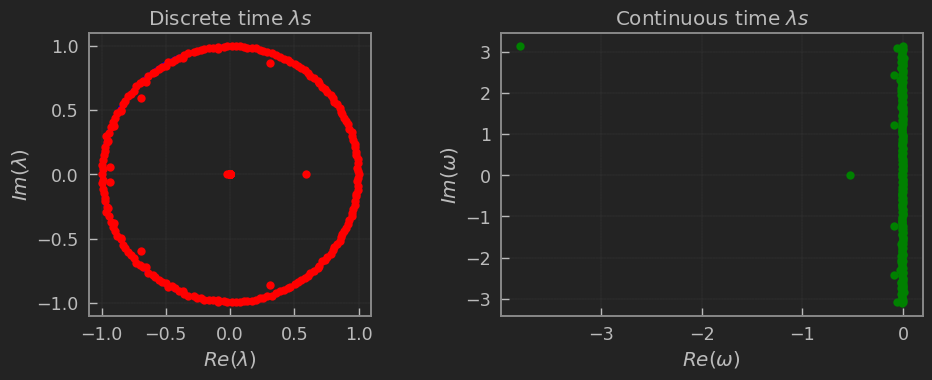

In [13]:
r = T-1

@DMD(mat,r, 'dmd_2')
def plot_complex(N_total, T, Phi, Lambda, b, X1, *args):
    Lambda = cp.asnumpy(Lambda)
    #dt = cp.asnumpy(T / (N_total - 1))  # Compute dt
    omega = np.log(Lambda)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot Lambda in the left subplot
    ax1.set_aspect('equal', adjustable='box')
    ax1.plot(Lambda.real, Lambda.imag, 'o', color='red', markersize=6)
    circle = plt.Circle((0, 0), 1, color='blue', linewidth=2.5, fill=False)
    ax1.add_patch(circle)
    ax1.grid(axis='both', linestyle="--", linewidth=0.1, color='gray')
    ax1.tick_params(direction="in")
    ax1.set_xlabel('$Re(\lambda)$')
    ax1.set_ylabel('$Im(\lambda)$')
    ax1.set_title('Discrete time $\lambda s$')
    
    # Plot omega in the right subplot
    ax2.plot(omega.real, omega.imag, 'o', color='green', markersize=6)
    ax2.grid(axis='both', linestyle="--", linewidth=0.1, color='gray')
    ax2.tick_params(direction="in")
    ax2.set_xlabel('$Re(\omega)$')
    ax2.set_ylabel('$Im(\omega)$')
    ax2.set_title('Continuous time $\lambda s$')
    
    plt.tight_layout()
    plt.show()

    return Phi

Phi = plot_complex()

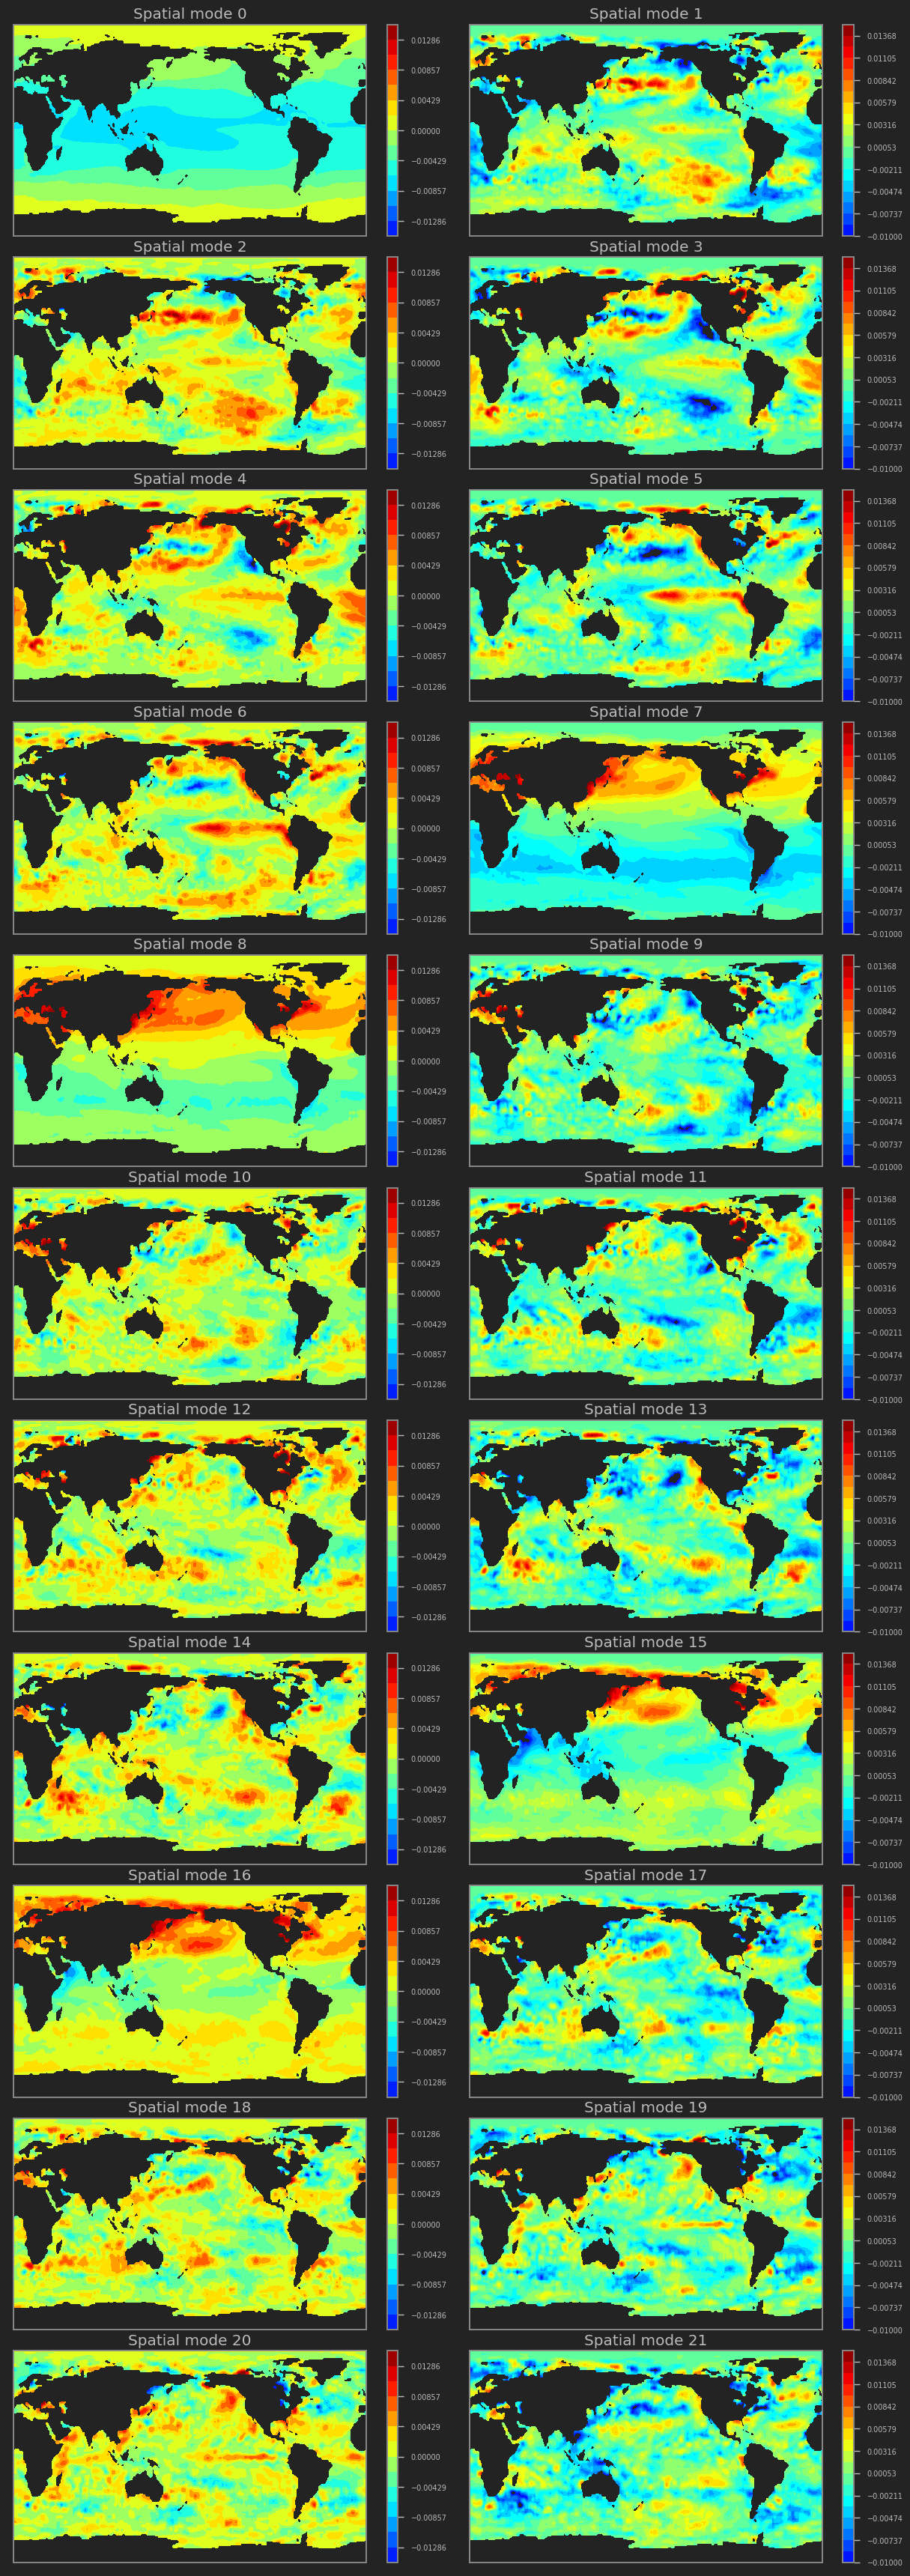

In [14]:
modes = 21
plot_geomodes(Phi, data_geo, mask, 0, modes, M, N)#, 'odd')

The solution of the discrete dynamical system in terms of eigenvalues, $\lambda_j$ and eigenvectors $\phi_j$ is given by 

1. The state of the system at time step $k$ can be represented as:

$$
x_k = \Phi \cdot \text{diag}(b) \cdot \Lambda^k = \begin{bmatrix} \phi_{11} & \phi_{12} & \cdots & \phi_{1r} \\ \phi_{21} & \phi_{22} & \cdots & \phi_{2r} \\ \vdots & \vdots & \ddots & \vdots \\ \phi_{n1} & \phi_{n2} & \cdots & \phi_{nr} \end{bmatrix} \cdot \begin{bmatrix} b_1 & 0 & \cdots & 0 \\ 0 & b_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & b_r \end{bmatrix} \cdot \begin{bmatrix} \lambda_1 \\ \lambda_2 \\ \vdots \\ \lambda_r \end{bmatrix}
$$

2. An equivalent representation of the state of the system at time step $k$ is:

$$
x_k = \Phi \cdot \text{diag}(\Lambda^k) \cdot b = \begin{bmatrix} \phi_{11} & \phi_{12} & \cdots & \phi_{1r} \\ \phi_{21} & \phi_{22} & \cdots & \phi_{2r} \\ \vdots & \vdots & \ddots & \vdots \\ \phi_{n1} & \phi_{n2} & \cdots & \phi_{nr} \end{bmatrix} \cdot \begin{bmatrix} \lambda_1^k & 0 & \cdots & 0 \\ 0 & \lambda_2^k & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \lambda_r^k \end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_r \end{bmatrix}
$$

where:

- $x_k$ is the state of the system at time step $k$.
- $\phi_j$ is the $j$-th DMD mode (eigenvector of the A matrix).
- $\lambda_j$ is the $j$-th DMD eigenvalue (eigenvalue of the A matrix).
- $b_j$ is the initial amplitude of the $j$-th DMD mode, or coordinates of $x$ wrt eigenvector basis
- $\Phi$ is the matrix of DMD modes.
- $\text{diag}(b)$ is a diagonal matrix with the initial amplitudes of the DMD modes.
- $\Lambda$ is a diagonal matrix with the DMD eigenvalues.

Both equations essentially provide the same information: the state of the system at any given time step can be reconstructed from the DMD modes, eigenvalues, and initial amplitudes. The first equation states that the state of the system at time step $k$ can be reconstructed by summing up the contributions from all DMD modes, each scaled by its corresponding eigenvalue raised to the power of $k$ and multiplied by its initial amplitude.

The second equation is an equivalent form of the first one, but it represents the evolution of the system state in a slightly different way. Here, the eigenvalues are raised to the power of $k$ first, and then the resulting diagonal matrix is multiplied by the vector of initial amplitudes.

In general the whole data matrix $X$ can be written as 

$$
X = \begin{bmatrix} \phi_1 & \phi_2 & \ldots & \phi_r \end{bmatrix} \begin{bmatrix} b_1 & 0 & \ldots & 0 \\ 0 & b_2 & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \ldots & b_r \end{bmatrix} \begin{bmatrix} \lambda_1^{m-1} & 0 & \ldots & 0 \\ 0 & \lambda_2^{m-1} & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \ldots & \lambda_r^{m-1} \end{bmatrix}
$$

This is a form of spectral decomposition, where the data matrix is represented as a sum of rank-1 matrices, each associated with a DMD mode. Each rank-1 matrix is formed by the outer product of a DMD mode, its corresponding initial amplitude, and its corresponding eigenvalue raised to the power of $m-1$.

In continuous time, the spatial modes dynamics of the system can be represented as:

$$
\Psi(t) = \Phi \cdot \text{diag}(b) \cdot \exp(\Omega t)
$$

where:

- $\Phi$ is the matrix of DMD modes.
- $\text{diag}(b)$ is a diagonal matrix with the initial amplitudes of the DMD modes.
- $\exp(\Omega t)$ is a diagonal matrix with the exponential of the DMD eigenvalues times the time step $t$.

This equation can be further expanded using the sigma notation:

$$
\Psi(t) = \sum_{i=1}^{r} \Phi_{:,i} \cdot b_i \cdot \exp(\omega_i t)
$$

where:

- $r$ is the number of DMD modes.
- $\Phi_{:,i}$ is the $i$-th column of the $\Phi$ matrix, representing the $i$-th DMD mode.
- $b_i$ is the initial amplitude of the $i$-th DMD mode.
- $\omega_i$ is the $i$-th DMD eigenvalue.
- $t$ is the time step.

This equation represents each column of the $\Psi(t)$ matrix, which corresponds to the time evolution of the $i$-th DMD mode. The sum over $i$ means that we sum up the contributions from all DMD modes to get the total time dynamics.

### Important!!!

The cp.diag() function in CuPy (and similarly in NumPy) has dual functionality:

- If you pass a 1D array to cp.diag(), it will return a 2D array (a diagonal matrix) with the elements of the 1D array on the diagonal and zeros elsewhere.

- If you pass a 2D array (a matrix) to cp.diag(), it will return a 1D array containing the diagonal elements of the matrix


After inspecting DMD spatial modes, we can choose modes in 'selected_modes=[1,2,3,4,5]' so that we do hope to reconstruct dynamics to discover El Nino. 

In [15]:
@DMD(mat,r, 'dmd_2')
def reconstruction(N_total, T, Phi, Lambda, b, X1, num_modes, selected_modes=None):
    '''
    This function reconstructs the original data from the Dynamic Mode Decomposition (DMD) modes and their time dynamics.

    Parameters:
    - N_total: The number of data points in each time step.
    - T: The total number of time steps.
    - Phi: A matrix of DMD modes, which represent the spatial structures in the data. The dimensions are (N_total, r), where r is the number of modes.
    - Lambda: A diagonal matrix of eigenvalues, which represent the temporal growth or decay rates of the modes. The dimensions are (r, r).
    - b: A vector of initial amplitudes of the modes. The dimensions are (r,).
    - X1: The first data matrix. The dimensions are (N_total, T-1).
    - num_modes: The number of DMD modes to use in the reconstruction.
    - selected_modes (optional): A list of indices of the modes to use in the reconstruction. If not provided, all modes are used.

    Returns:
    - mat_app: A matrix of the reconstructed data. The dimensions are (N_total, T).
    - time_dynamics: A matrix of the time dynamics of the modes. The dimensions are (r, T).
    '''

    omega = cp.log(cp.diag(Lambda))
    mat_app = cp.zeros_like(mat)
    #bb = cp.linalg.pinv(Phi) @ X1[:, 0]
    bb = cp.squeeze(b)
    eigvals = cp.diag(Lambda)
    

    time_dynamics = cp.zeros((r, T), dtype = 'complex')

    for step in range(T):
        #time_dynamics[:, step] = cp.asnumpy(cp.power(eigvals, step + 1) * bb)
        time_dynamics[:, step] = cp.asarray(cp.power(eigvals, step + 1) * bb)

        # Compute the time evolution of the modes
        if selected_modes is None:
            modes = [cp.exp(omega[i] * step) * bb[i] for i in range(num_modes)]
            mat_app[:, step] = np.real(cp.squeeze(cp.sum(cp.asarray([Phi[:, i:i+1] * modes[i] for i in range(num_modes)]), axis=0)))
        else:
            modes = [cp.exp(omega[i] * step) * bb[i] for i in selected_modes]
            mat_app[:, step] = np.real(cp.squeeze(cp.sum(cp.asarray([Phi[:, i:i+1] * modes[idx] for idx, i in enumerate(selected_modes)]), axis=0)))

    return mat_app, time_dynamics.real

#reconstructed_data = reconstruction(2)
# reconstructed_data_single_mode = reconstruction(3, selected_modes=[0])
reconstructed_data, time_dyna = reconstruction(r, selected_modes=[1,2,3,4,5,13,14,19,20])

# Perform tensor reshaping
tensor_reconstructed = cp.zeros((T, M, N))
for t in range(T):
    tensor_reconstructed[t, :, :] = reconstructed_data[:, t].reshape((M, N))

reconstructed_data = cp.asnumpy(tensor_reconstructed)
print(np.nanmin(reconstructed_data), np.nanmax(reconstructed_data))

-5.029628196067678 4.094499178449424


Let's plot the time dynamics of eigenvalues $b \lambda_k^{m-1} $ for $m-1$ eigenvalue at $k^{th}$-time.

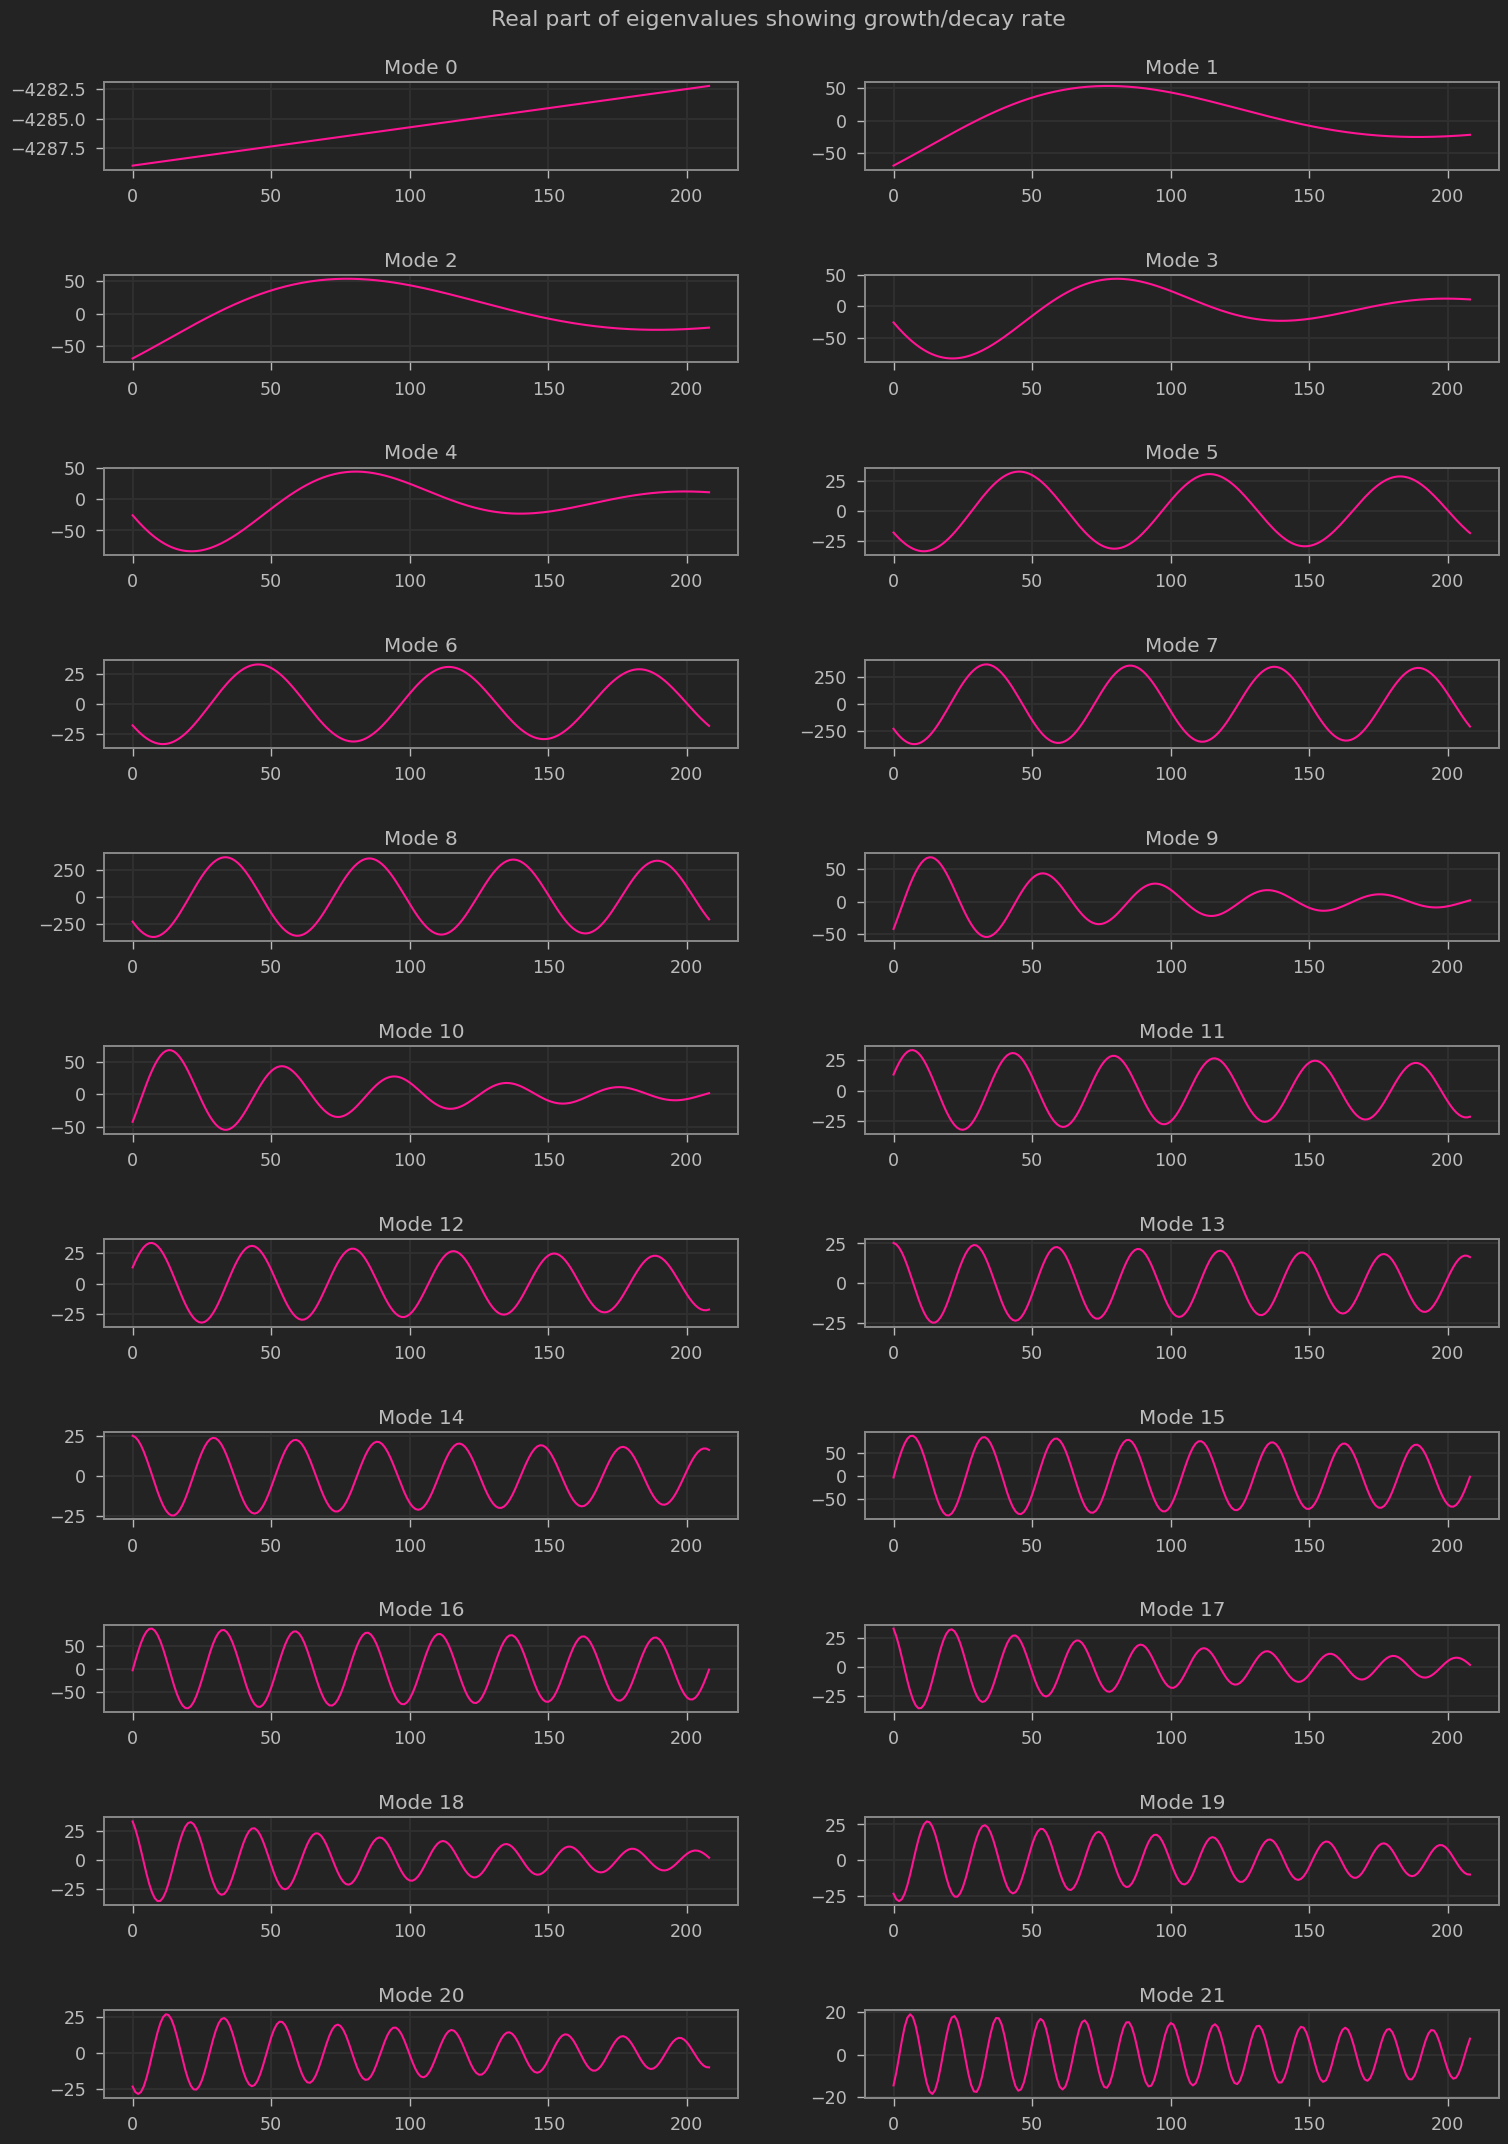

In [17]:
time_dyna = cp.asnumpy(time_dyna)
start_mode = 0
end_mode = 21
num_cols = 2
num_rows = ((end_mode - start_mode) + num_cols) // num_cols  # Calculate the number of rows based on the range of modes

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 24))
fig.subplots_adjust(hspace=1.2, wspace=0.2, top=0.95)

plot_modes = range(start_mode, end_mode + 1)  # Specify the range of modes to plot

for i, mode in enumerate(plot_modes):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.plot(time_dyna[mode], color='deeppink')
    ax.set_title(f"Mode {mode}")

# Hide the empty subplots if the number of modes is not a multiple of num_cols
if len(plot_modes) % num_cols != 0:
    for i in range(len(plot_modes), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

fig.suptitle("Real part of eigenvalues showing growth/decay rate")
plt.show()


The plots generated above show the time dynamics of each mode obtained from the DMD of the global ocean temperature data. Each plot corresponds to a different mode, and the y-axis values represent the amplitude of that mode at each time step. The x-axis represents time.

In the context of DMD, each mode represents a spatial pattern in the data, and the time dynamics show how the amplitude of that pattern changes over time. The patterns could represent various physical phenomena, such as seasonal temperature variations, long-term warming or cooling trends, or the effects of specific events like El Niño.

The reason why the y-axis values vary between plots is that each mode has a different amplitude. Some modes may have a large effect on the data, resulting in large amplitude values, while others may have a smaller effect, resulting in smaller amplitude values. The range of the y-axis in each plot is adjusted to fit the amplitude of the corresponding mode, which is why the y-axis ranges vary between plots.

As for the general interpretation of the eigenvalues plotted, the eigenvalues of the DMD operator are generally complex numbers, and their real parts represent the growth or decay rate of the corresponding modes. If the real part of an eigenvalue is positive, the corresponding mode grows exponentially over time, while if the real part is negative, the mode decays exponentially over time. The imaginary part of the eigenvalue represents the mode's oscillation frequency.

Now we can plot the reconstructed dynamic. Adjust parameter 'every_week'.

In [18]:
every_week = 10
create_animation_recon(reconstructed_data, data_geo, mask,every_week, start_date, end_date)

From the plot, we can observe the correct discovery of El Nino for 2006-2007 and 2015. However, the represented basic DMD cannot deal well with transient patterns, which usually occur during longer time intervals. It is the result that native DMD discovers well cycling patterns only. The remedy would be, e.g., robust, residual DMD or DMD backed by neural networks. These topics will be addressed in future blog posts. 


## Citations
[<a id="1">1</a>]: [A Data–Driven Approximation of the Koopman Operator: Extending Dynamic Mode Decomposition](https://arxiv.org/abs/1408.4408)

[<a id="2">2</a>]: [Ergodic Theory, Dynamic Mode Decomposition, and Computation of Spectral Properties of the Koopman Operator](https://arxiv.org/abs/1611.06664)

[<a id="3">3</a>]: [Extended dynamic mode decomposition with dictionary learning: A data-driven adaptive spectral decomposition of the Koopman operator](https://dx.doi.org/10.1063/1.4993854)

[<a id="4">4</a>]: [On Convergence of Extended Dynamic Mode Decomposition to the Koopman Operator](https://arxiv.org/abs/1703.04680)
